In [19]:
text = """
Few-shot object detection (FSOD) has received numerous attention due to the difficulty and time-consuming of labeling objects. Recent researches achieve excellent performance in a natural scene by only using a few instances of novel classes to fine-tune the last prediction layer of the model well-trained on plentiful base data. However, compared with natural scene objects with a single direction and small size variety, the direction and size of the objects in remote sensing images (RSIs) vary greatly. The methods proposed for the natural scene cannot be directly applied to RSIs. In this article, we first propose a strong baseline for RSIs. It fine-tunes all detector components acting on high-level features and effectively improves the performance of novel classes. Further analyzing the results of the baseline, we find that the error for novel classes is mainly concentrated in classification. It misclassifies novel classes as confusable base classes or backgrounds due to the difficulty in extracting generalized information from limited instances. As is well-known, text-modal knowledge can highly summarize the generalized and unique characteristics of categories. Thus, we introduce text-modal descriptions for each category and propose an FSOD method guided by TExt-MOdal knowledge, called TEMO. Specifically, a text-modal knowledge extractor and a cross-modal assembly module are proposed to extract text features and fuse the text-modal features into visual-modal features. The fused features greatly reduce the classification confusion of novel classes. Furthermore, we introduce a mask strategy and a separation loss to avoid over-fitting and ambiguity of text-modal features. Experimental results on detection in optical remote sensing images (DIOR), Northwestern Polytechnical University (NWPU), and fine-grained object recognition in high-resolution remote sensing imagery (FAIR1M) illustrate that our TEMO achieves state-of-the-art performance in all settings.
"""

global_path = 'C:/Users/adhem/Desktop/Python/ALTTSGS/'

In [ ]:
import sys; sys.path.append(global_path)

In [21]:
from kokoro import KPipeline, KModel

model = KModel(config = global_path + 'src/assets/weights/tts/config.json', model = global_path + 'src/assets/weights/tts/kokoro-v1_0.pth')

pipeline = KPipeline(
    lang_code='a',
    device='cpu',
    model = model
)

In [ ]:
import time
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [25]:
max_world_n = 30
simulation_n = 3

words = text.split()
times = []
times_audio = []
lengths = []
for n in tqdm(range(0, max_world_n * simulation_n )):
    # Sample 'n' distinct words
    sampled_words = random.sample(words,1 + n % max_world_n)
    text_chunk = " ".join(sampled_words)

    # Measure generation time
    start_time = time.time()
    generator = pipeline(text_chunk, voice='af_heart', speed=1, split_pattern=r'\n+')
    for i, (gs, ps, audio) in enumerate(generator):
        audio_time = len(audio) / 24000.0 
    total_time = time.time() - start_time

    # Store length (char count) and generation time
    lengths.append(len(text_chunk))
    times.append(total_time)
    times_audio.append(audio_time)

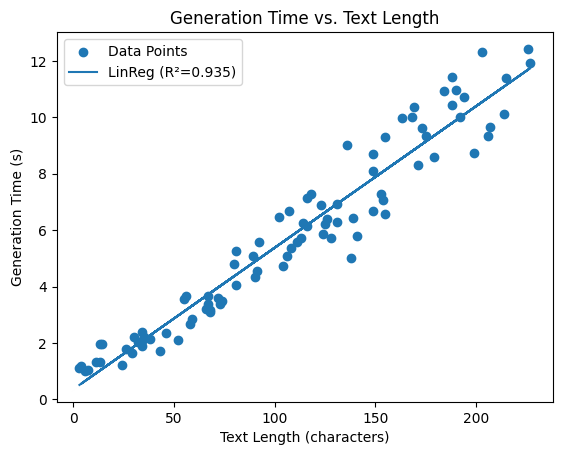

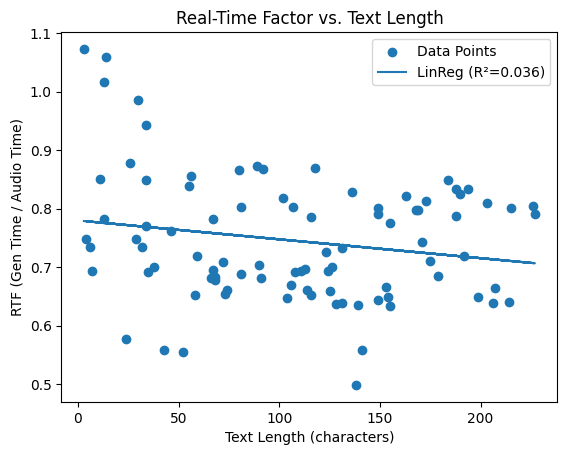

In [26]:
from scipy.stats import linregress

rtfs = [
    t / a if a > 0 else float('inf')
    for t, a in zip(times, times_audio)
]

# ---- Plot: Generation Time vs. Text Length ----
plt.scatter(lengths, times, label="Data Points")
slope, intercept, r_value, p_value, std_err = linregress(lengths, times)
pred_times = [slope * L + intercept for L in lengths]
plt.plot(lengths, pred_times, label=f"LinReg (R²={r_value**2:.3f})")
plt.xlabel("Text Length (characters)")
plt.ylabel("Generation Time (s)")
plt.title("Generation Time vs. Text Length")
plt.legend()
plt.show()

# ---- Plot: RTF vs. Text Length ----
plt.scatter(lengths, rtfs, label="Data Points")
slope_rtf, intercept_rtf, r_value_rtf, _, _ = linregress(lengths, rtfs)
pred_rtfs = [slope_rtf * L + intercept_rtf for L in lengths]
plt.plot(lengths, pred_rtfs, label=f"LinReg (R²={r_value_rtf**2:.3f})")
plt.xlabel("Text Length (characters)")
plt.ylabel("RTF (Gen Time / Audio Time)")
plt.title("Real-Time Factor vs. Text Length")
plt.legend()
plt.show()